# Exploratory Data Analysis (EDA) Outline


In [24]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from models.preparation import compute_correlation

## Aperçu Initial des Données

In [25]:
raw_data = pd.read_csv(r'models\data\data.csv', delimiter=';')

In [26]:
raw_data.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21903,31,technician,single,university.degree,unknown,yes,no,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
4374,52,management,married,university.degree,unknown,yes,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
23616,42,housemaid,married,university.degree,no,yes,yes,cellular,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,yes
18528,30,technician,single,university.degree,no,no,no,cellular,jul,thu,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
1978,45,admin.,married,high.school,no,no,yes,telephone,may,fri,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
21279,36,technician,single,high.school,unknown,no,no,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
5546,27,unemployed,married,high.school,no,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
36318,43,admin.,married,high.school,unknown,yes,no,cellular,jun,mon,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2,no
26325,33,services,married,high.school,no,yes,yes,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
6958,58,technician,married,professional.course,no,yes,no,telephone,may,thu,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no


In [27]:
raw_data.isna().sum().sum() # Nombre de valeurs manquantes

0

In [28]:
raw_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [29]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [30]:
raw_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [31]:
raw_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [32]:
raw_data.shape[0]-raw_data.drop(['emp.var.rate',
                                 'cons.price.idx', 
                                 'cons.conf.idx', 
                                 'euribor3m', 
                                 'nr.employed'], axis=1).drop_duplicates().shape[0]


13

This suggests that the dataset has a high level of detail and is not overly redundant

## Data Cleaning

les donnee sont deja propre et il n'y a pas de valeurs manquantes

In [33]:
data = raw_data.copy()
data = data.drop(columns='duration') # Suppression de la colonne duration qui n'est pas connue avant le début de la campagne
data['pdays'] = data['pdays'].replace(999, -1) # Pour faciliter l'interprétation

In [34]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,-0.741988,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,1.510327,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,-1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,-1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,-1.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,-1.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [35]:
raw_data.shape[0]-raw_data.drop_duplicates().shape[0]

12

In [36]:
data.shape[0]-data.drop_duplicates().shape[0]

1784

We can see that there are duplicate rows either by coincidence or because we removed the duration column


In [37]:
# show only duplicates
data[data.duplicated(keep=False)].sort_values(by=list(data.columns)).head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37284,19,student,single,basic.9y,no,no,no,cellular,aug,mon,1,3,1,success,-2.9,92.201,-31.4,0.884,5076.2,no
37301,19,student,single,basic.9y,no,no,no,cellular,aug,mon,1,3,1,success,-2.9,92.201,-31.4,0.884,5076.2,no
31198,20,blue-collar,single,high.school,no,yes,no,cellular,may,wed,1,-1,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
31205,20,blue-collar,single,high.school,no,yes,no,cellular,may,wed,1,-1,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
14865,21,admin.,single,high.school,no,yes,no,cellular,jul,wed,1,-1,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
14866,21,admin.,single,high.school,no,yes,no,cellular,jul,wed,1,-1,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
14870,21,admin.,single,high.school,no,yes,no,cellular,jul,wed,1,-1,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
13386,21,blue-collar,single,basic.9y,no,unknown,unknown,cellular,jul,wed,1,-1,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
13387,21,blue-collar,single,basic.9y,no,unknown,unknown,cellular,jul,wed,1,-1,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16980,22,blue-collar,married,basic.9y,no,yes,no,cellular,jul,thu,1,-1,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


In [38]:
for column in raw_data.select_dtypes(include='object').columns:
    data[column] = data[column].astype('category')

In [39]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [55]:
raw_data.shape[0] , raw_data[(raw_data=="unknown").any(axis=1)].shape[0], raw_data.shape[0] - raw_data[(raw_data=="unknown").any(axis=1)].shape[0]

(41188, 10700, 30488)

In [40]:
discret_cols = data.select_dtypes(include='int64').columns
continuous_cols = data.select_dtypes(include='float64').columns
categorical_cols = data.select_dtypes(include='category').columns
numerical_cols = data.select_dtypes(include='number').columns

## Univariate Analysis


### Numerical Variables

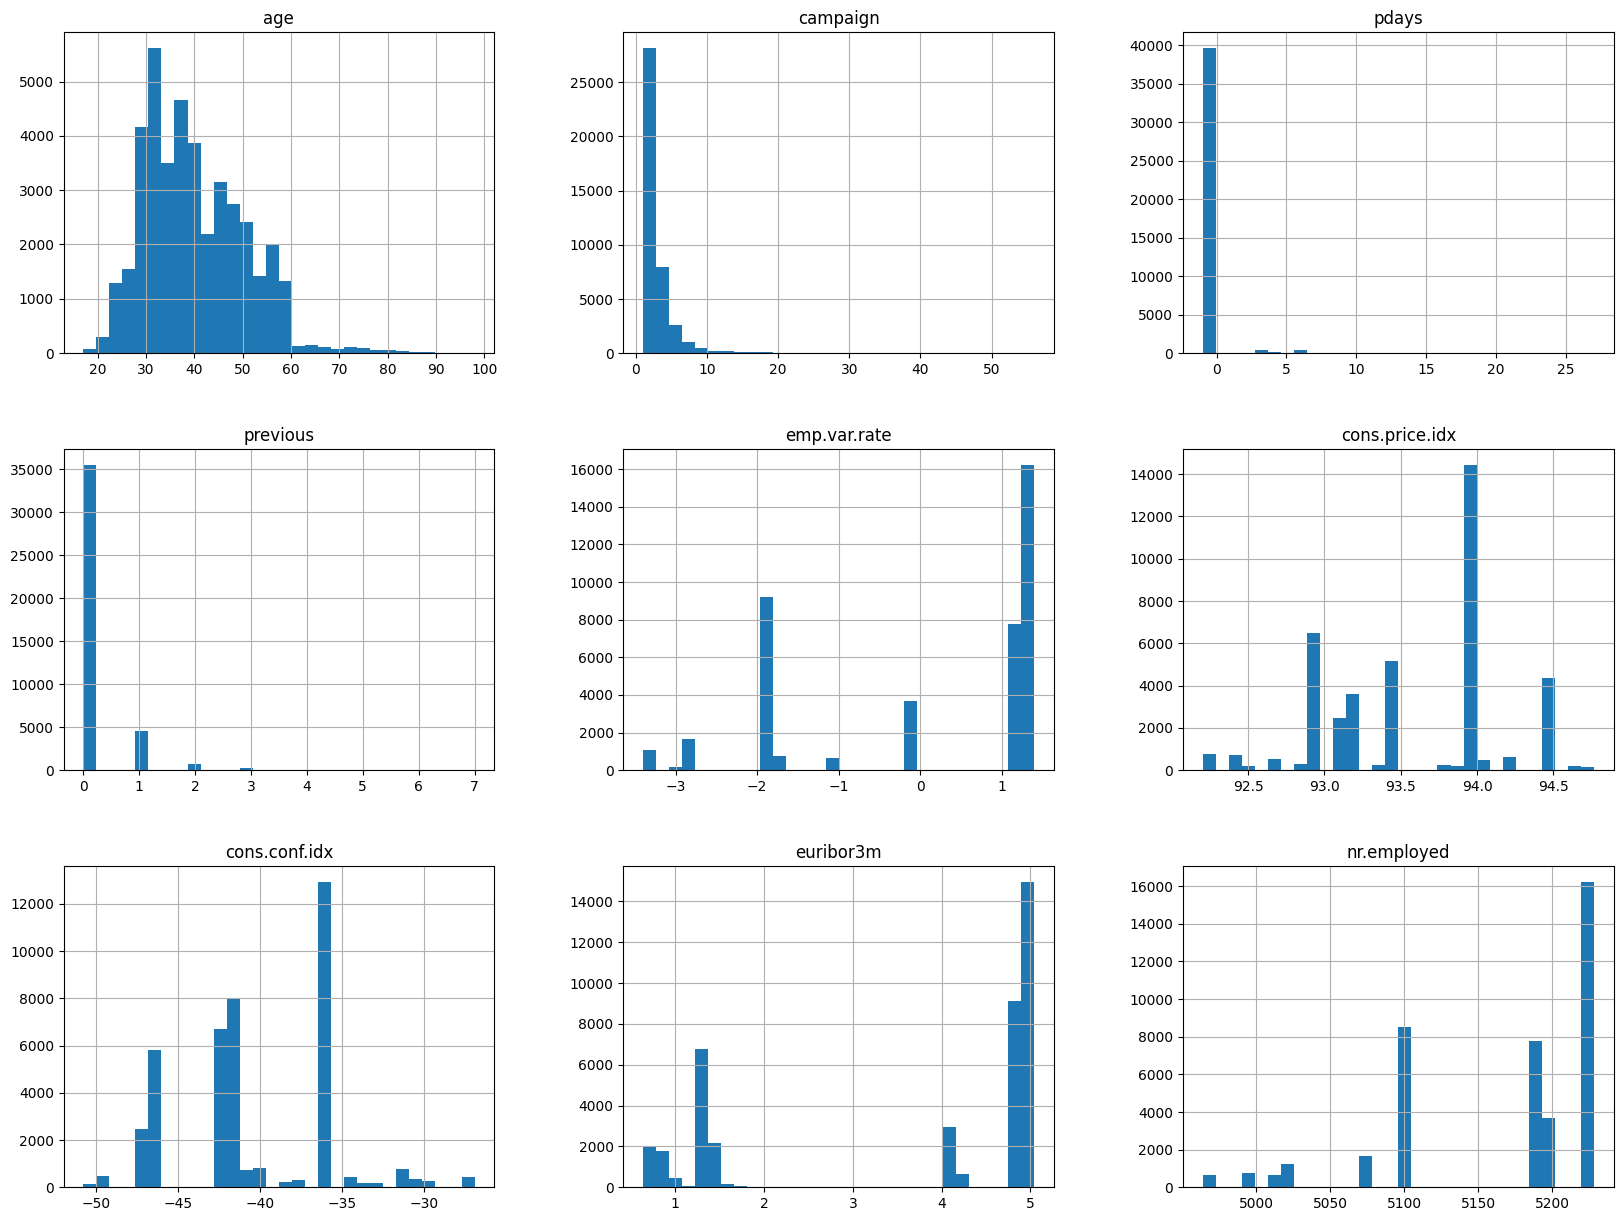

In [41]:
data[numerical_cols].hist(bins=30, figsize=(20, 15))
plt.show()


1. **Age**: The age distribution is positively skewed, with the majority of clients being between 20 and 60 years old, peaking around 30–40.

2. **Campaign**: Most clients were contacted only once during the current campaign. The count decreases sharply as the number of contacts increases.

3. **Pdays**: The majority of clients have not been contacted in previous campaigns (`-1` indicates no prior contact). A very small portion shows recent recontacts.

4. **Previous**: Most clients have not been contacted previously (`0`), and only a few have been contacted more than once in earlier campaigns.

5. **Emp.var.rate**: The employment variation rate is concentrated around a few specific values, suggesting distinct economic periods or reporting intervals.

6. **Cons.price.idx**: The consumer price index clusters around specific values, indicating a relatively stable price environment with some fluctuation.

7. **Cons.conf.idx**: Consumer confidence index is spread over a range, with a concentration around -40, reflecting overall consumer sentiment during the period.

8. **Euribor3m**: The 3-month Euribor rate is clustered at a few distinct values, likely representing the prevailing financial conditions.

9. **Nr.employed**: Most values fall into distinct categories, with a large concentration around 5100–5200 thousand employees, indicating a relatively stable employment scenario.

#### Observations:
- Features like **campaign**, **pdays**, and **previous** suggest that the bank frequently targets new clients and rarely follows up with prior contacts.
- Highly skewed variables (e.g., **pdays**, **campaign**) may require transformation for modeling purposes to reduce bias in machine learning models.

### Categorical Data


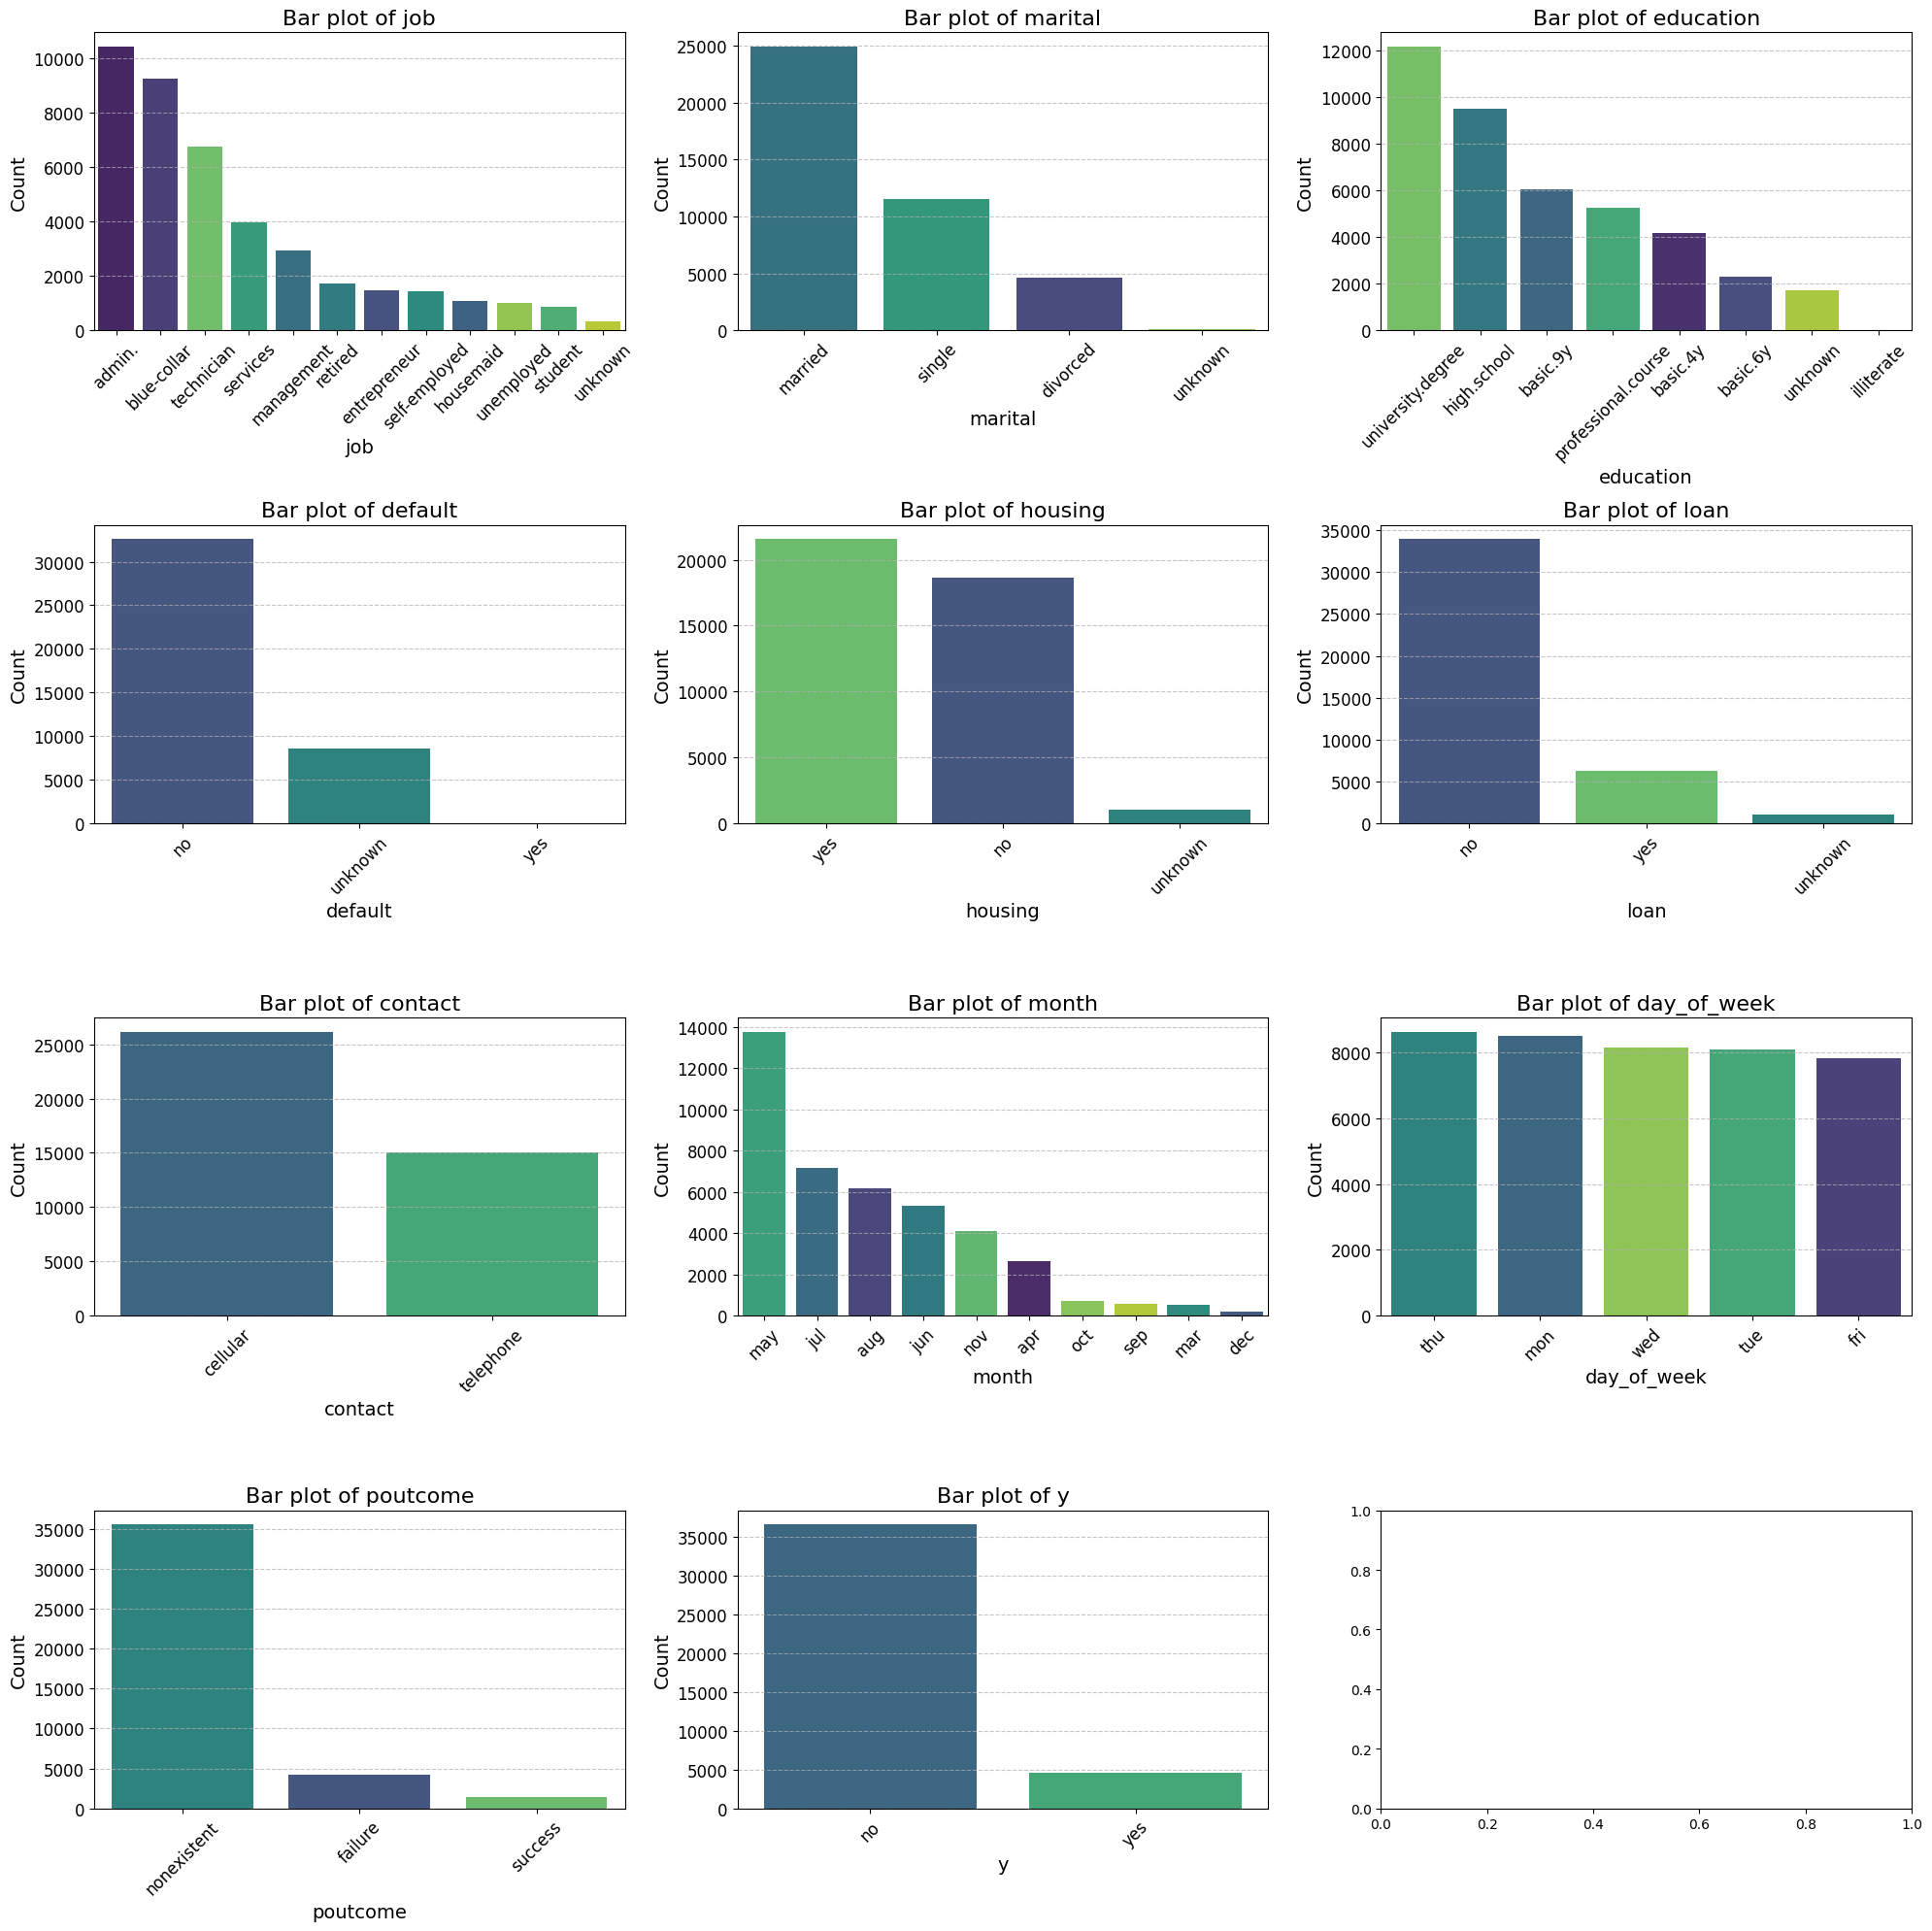

In [42]:
# Set up the grid dimensions (number of rows and columns)
ncols = 3  # Number of columns in the plot grid
nrows = (len(categorical_cols) // ncols) + 1  # Calculate number of rows

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

# Flatten the axes to make it easier to iterate
axes = axes.flatten()

# Counter for the axes
plot_idx = 0

# Loop through categorical columns
for col in categorical_cols:
    # Create a count plot on the respective subplot
    sns.countplot(x=data[col], hue=data[col], order=data[col].value_counts().index, palette='viridis', legend=False, ax=axes[plot_idx])
    axes[plot_idx].set_title(f'Bar plot of {col}', fontsize=16)
    axes[plot_idx].set_xlabel(col, fontsize=14)
    axes[plot_idx].set_ylabel('Count', fontsize=14)
    axes[plot_idx].tick_params(axis='x', rotation=45, labelsize=12)
    axes[plot_idx].tick_params(axis='y', labelsize=12)
    axes[plot_idx].grid(axis='y', linestyle='--', alpha=0.7)
    plot_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()


- **Job, Marital, and Education**: Most clients are employed in administrative or blue-collar jobs, with a significant portion in technician roles. A large majority are married, followed by single individuals. Educationally, university graduates dominate, though high school and basic education categories are also prominent. These factors could reflect the bank's primary target demographic for marketing campaigns.

- **Default, Housing, and Loan**: Very few clients have defaulted on loans, but housing loans are common. Personal loans are less frequent. These trends suggest the financial stability of the majority of the client base, which could influence the likelihood of subscribing to new financial products.

- **Contact and Month**: Cellular is the dominant mode of contact, highlighting the move toward more direct and personalized outreach. Campaign activity peaks in May, followed by progressively declining volumes in later months. This suggests a strategic push during a specific period, possibly tied to budget cycles or seasonal factors.

- **Day of the Week**: Calls are evenly distributed across weekdays, indicating no specific preference for a particular day to initiate contact.

- **Poutcome and Y (Target Variable)**: Most clients are marked as "nonexistent" for previous campaign outcomes, suggesting new outreach. Among those contacted, the success rate for subscription ("yes" in `y`) is relatively low compared to those who did not subscribe ("no"). This highlights the challenge of improving conversion rates.

## Bivariate Analysis


### Numerical vs Numerical

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,campaign,pdays,previous
emp.var.rate,1.00,0.78,0.20,0.97,0.91,-0.00,0.15,-0.23,-0.42
cons.price.idx,0.78,1.00,0.06,0.69,0.52,0.00,0.13,-0.05,-0.20
cons.conf.idx,0.20,0.06,1.00,0.28,0.10,0.13,-0.01,0.07,-0.05
euribor3m,0.97,0.69,0.28,1.00,0.95,0.01,0.14,-0.26,-0.45
nr.employed,0.91,0.52,0.10,0.95,1.00,-0.02,0.14,-0.34,-0.50
age,-0.00,0.00,0.13,0.01,-0.02,1.00,0.00,0.02,0.02
campaign,0.15,0.13,-0.01,0.14,0.14,0.00,1.00,-0.04,-0.08
pdays,-0.23,-0.05,0.07,-0.26,-0.34,0.02,-0.04,1.00,0.51
previous,-0.42,-0.20,-0.05,-0.45,-0.50,0.02,-0.08,0.51,1.00


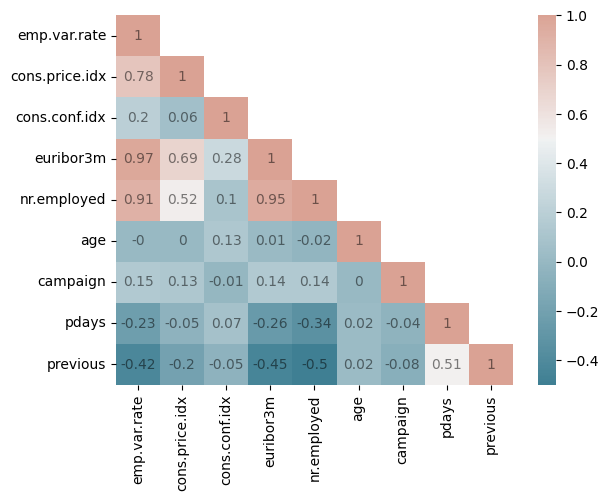

In [43]:
compute_correlation(data)

Based on the correlation matrix, the following features are highly correlated and can be dropped to reduce redundancy:

- **`emp.var.rate`** (correlated with `euribor3m` at 0.97): Retain `euribor3m` for its stronger overall relevance.  
- **`nr.employed`** (correlated with `euribor3m` at 0.95): `euribor3m` captures similar information more effectively.  

dropping `emp.var.rate` and `nr.employed`

In [44]:
# data.drop(columns=['emp.var.rate', 'nr.employed'], inplace=True)

### Numerical vs Categorical


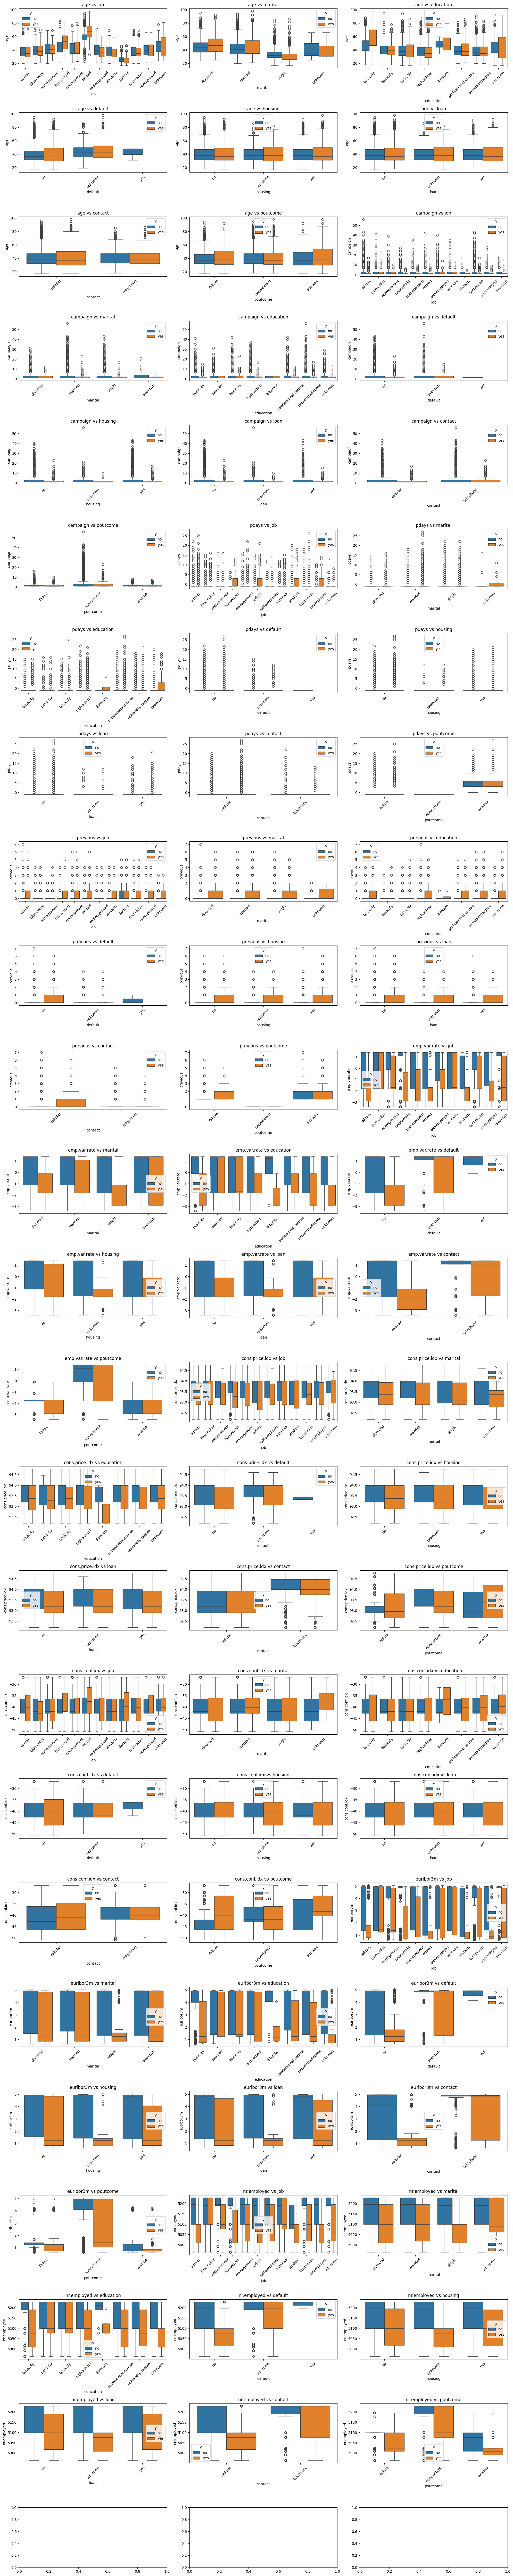

In [45]:
numerical_vars = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

# Set up the grid dimensions (number of rows and columns)
ncols = 3  # Number of columns in the plot grid
nrows = (len(numerical_vars) * len(categorical_vars) // ncols) + 1  # Calculate number of rows

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 100))

# Flatten the axes to make it easier to iterate
axes = axes.flatten()

# Counter for the axes
plot_idx = 0

# Loop through numerical and categorical variables
for num_var in numerical_vars:
    for cat_var in categorical_vars:
        if cat_var in data.columns:
            # Create a boxplot on the respective subplot
            sns.boxplot(x=data[cat_var], y=data[num_var], hue=data['y'], ax=axes[plot_idx])
            axes[plot_idx].set_title(f'{num_var} vs {cat_var}')
            axes[plot_idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
            plot_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()


- Continuous Variables (Boxplots by `y`):
  - **Age**: The distribution shows no significant difference between clients who subscribed (`y = yes`) and those who didn’t (`y = no`), although the median age for subscribers appears slightly lower in general.
  - **Campaign and Previous**: Subscribers tend to have fewer calls during the current campaign but a slightly higher count of past interactions, indicating that prior engagement might increase the likelihood of subscription.
  - **Emp. Var. Rate, Cons. Price Index, and Euribor 3m**: Subscribers are associated with higher economic activity indicators, suggesting that favorable economic conditions might influence subscription likelihood.
- **Cons. Conf. Index**: Clients are more likely to subscribe when consumer confidence is higher.

- Categorical Variables (Barplots by `y`):
  - **Job**: Students, retirees, and administrative roles show higher subscription rates compared to other professions like blue-collar workers.
  - **Marital Status**: Singles have a higher likelihood of subscribing, whereas married individuals are less likely to.
  - **Education**: Higher education levels (university degree or professional course) correlate with increased subscription rates.
  - **Default and Loan**: Clients with no defaults and no consumer loans have higher subscription rates, reflecting a pattern of financial stability among subscribers.
  - **Housing Loan**: Interestingly, clients with a housing loan are less likely to subscribe, possibly due to financial constraints.

- Temporal Variables:
  - **Month**: Campaigns conducted in March, September, and December seem more effective compared to those in May and June, where subscription rates are notably lower.
  - **Day of the Week**: No strong pattern emerges, as subscription likelihood seems evenly distributed across weekdays.

- Previous Campaign Outcome:
  - Clients whose outcomes in previous campaigns were successful are far more likely to subscribe again, highlighting the importance of historical success in targeted marketing.


### Categorical vs Categorical


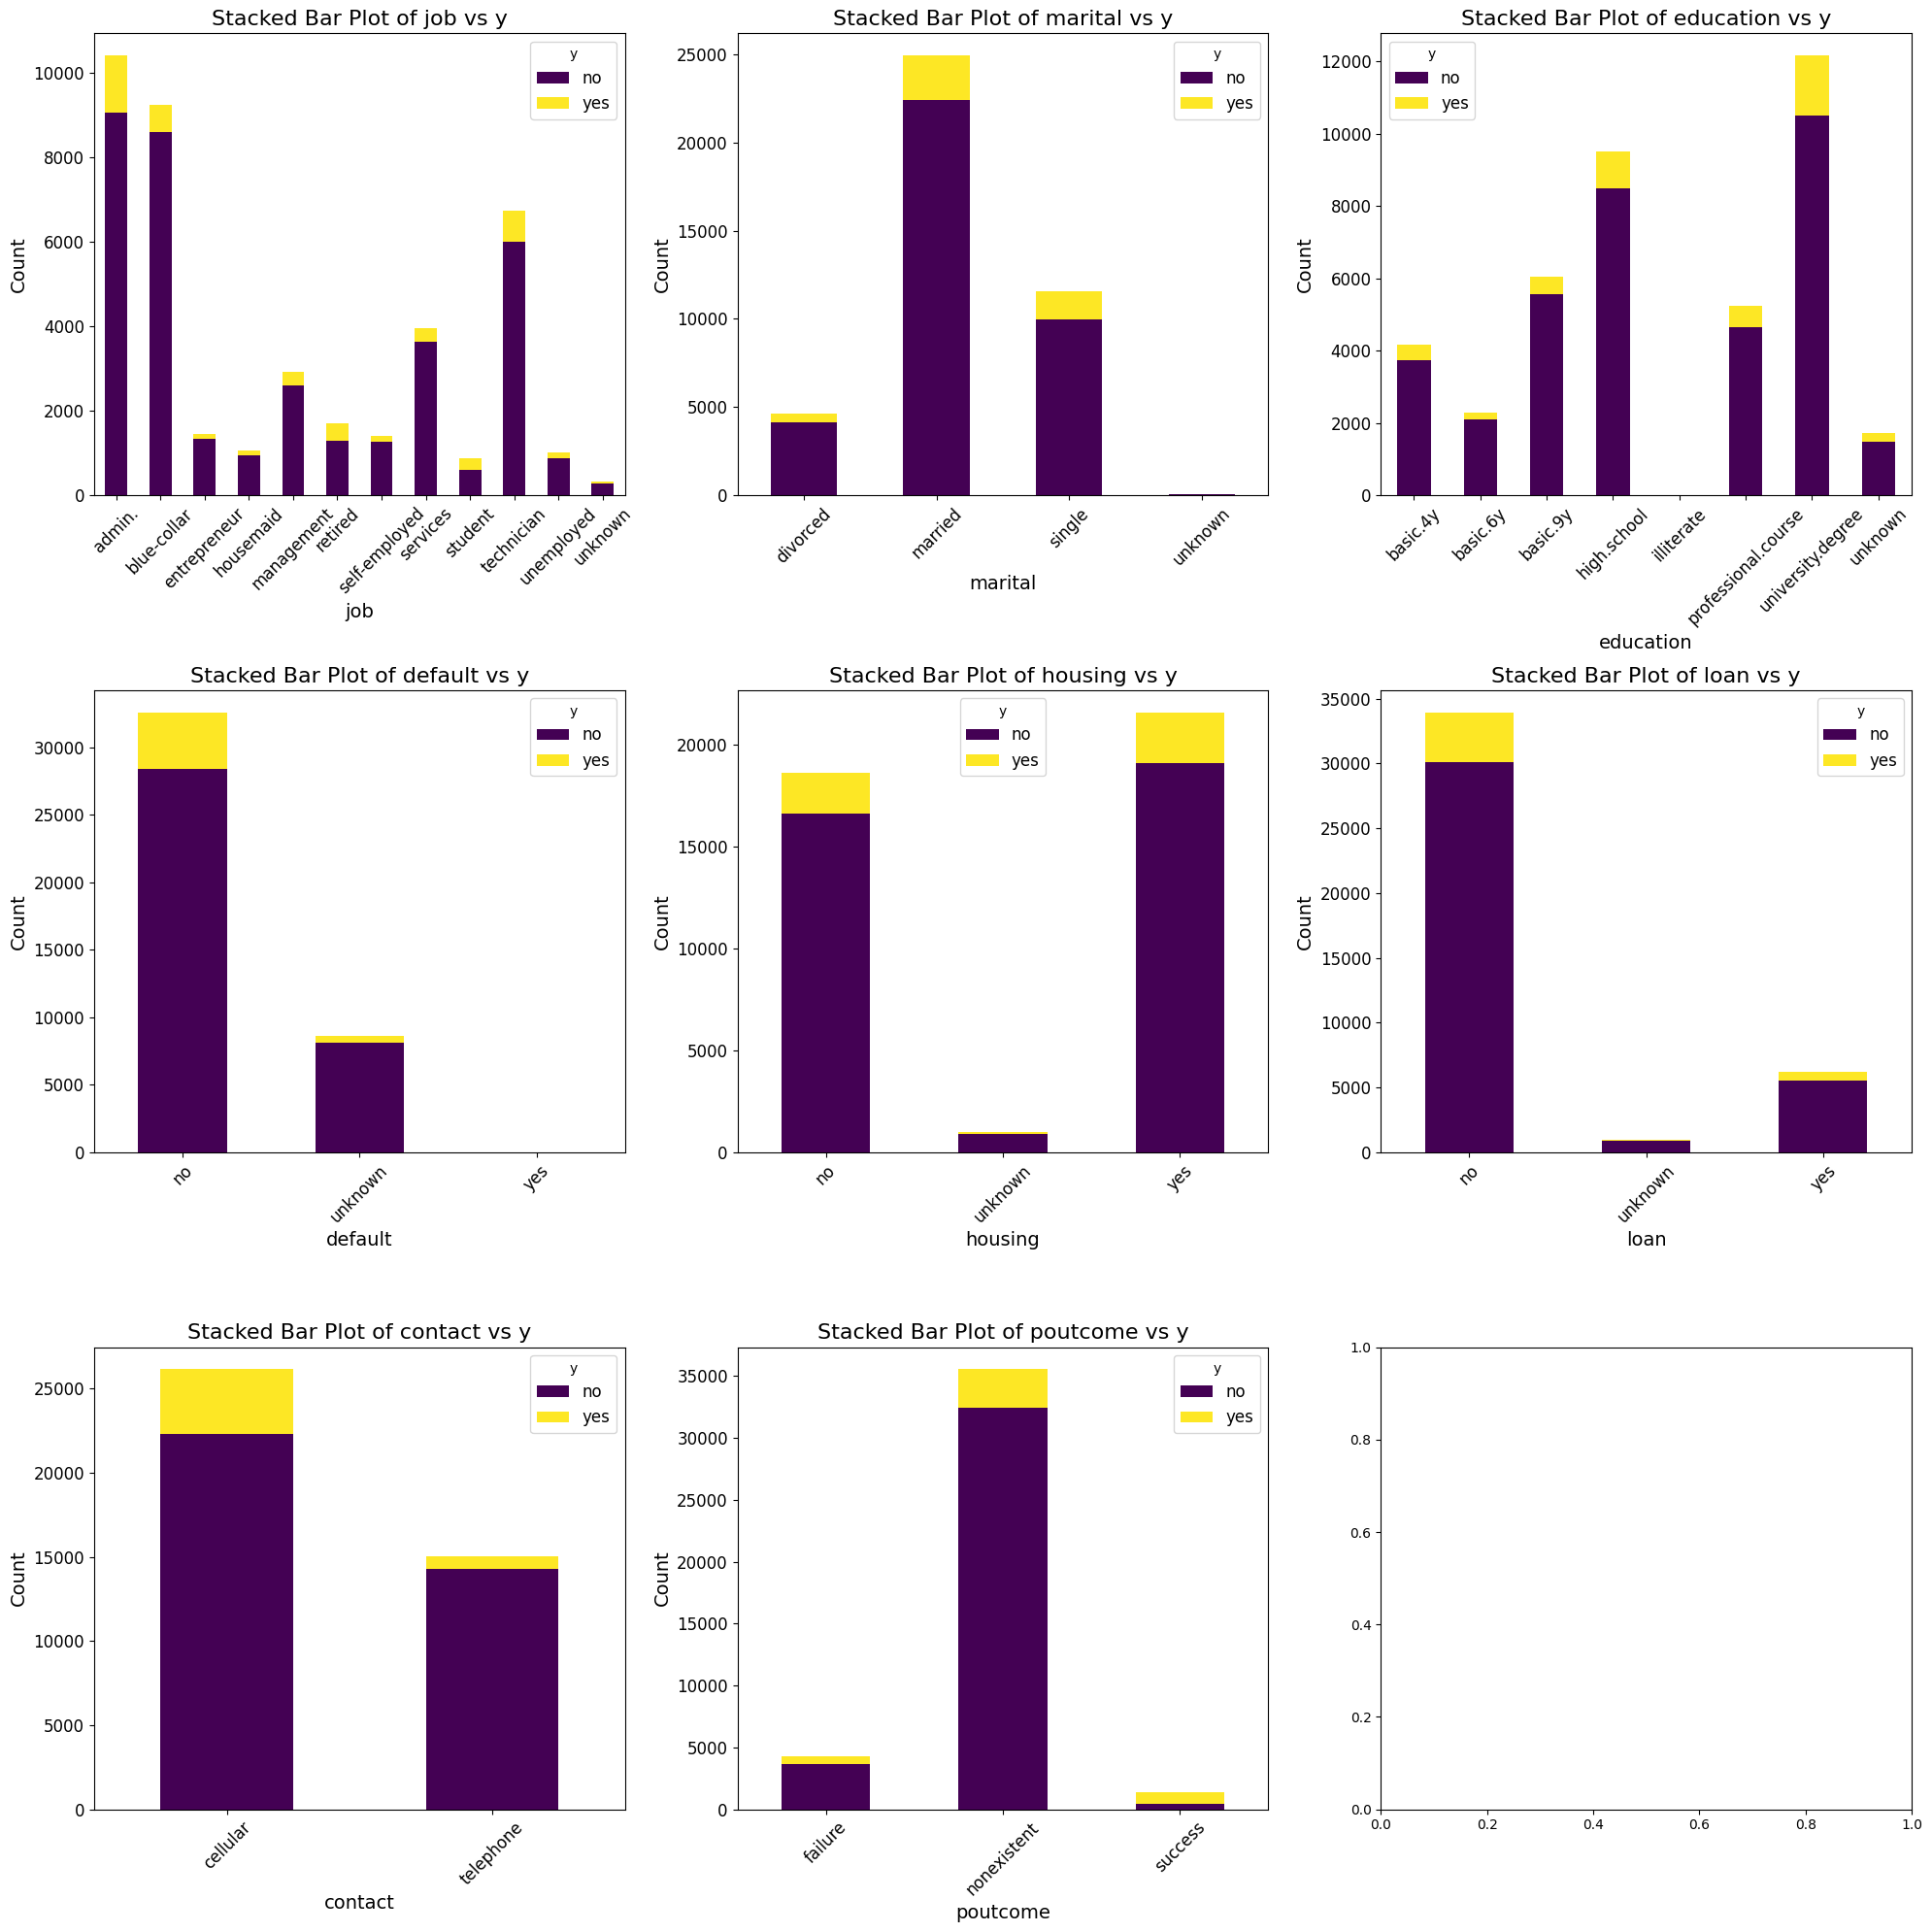

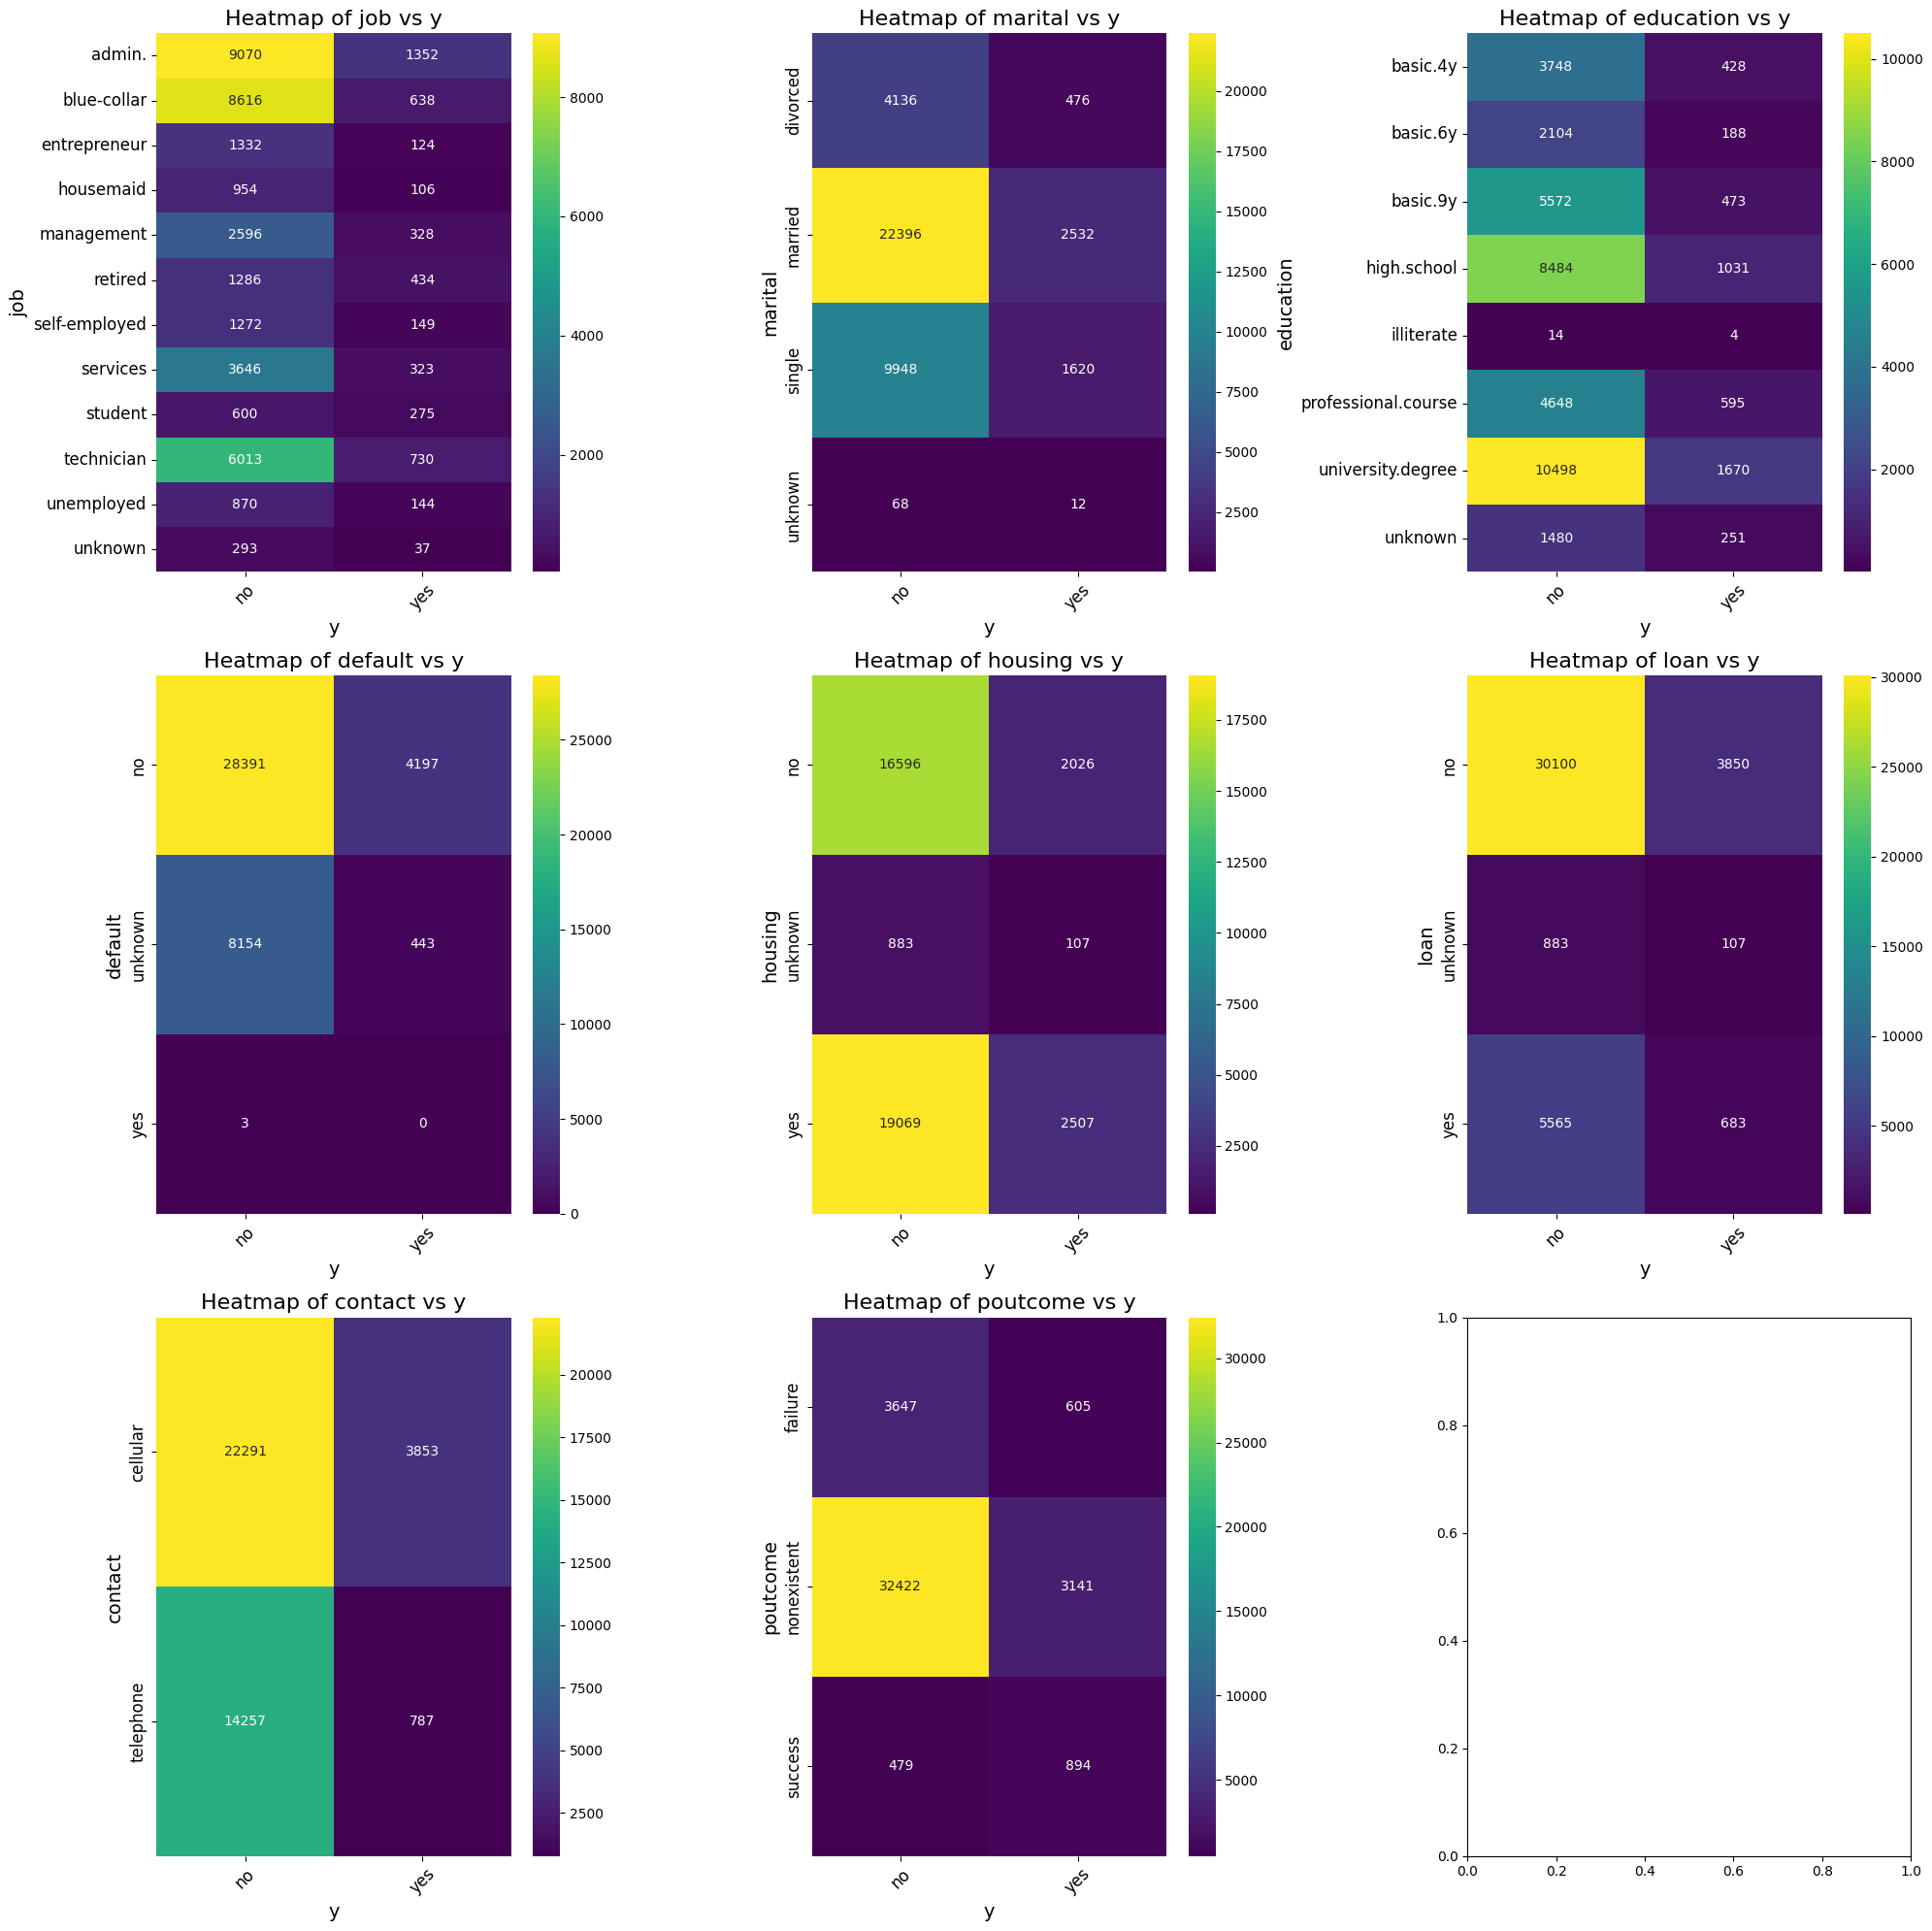

In [46]:
# Stacked Bar Plots
ncols = 3  # Number of columns in the plot grid
nrows = (len(categorical_vars) // ncols) + 1  # Calculate number of rows

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

# Flatten the axes to make it easier to iterate
axes = axes.flatten()

# Counter for the axes
plot_idx = 0

# Loop through categorical variables
for cat_var in categorical_vars:
  # Create a stacked bar plot on the respective subplot
  crosstab = pd.crosstab(data[cat_var], data['y'])
  crosstab.plot(kind='bar', stacked=True, ax=axes[plot_idx], colormap='viridis')
  axes[plot_idx].set_title(f'Stacked Bar Plot of {cat_var} vs y', fontsize=16)
  axes[plot_idx].set_xlabel(cat_var, fontsize=14)
  axes[plot_idx].set_ylabel('Count', fontsize=14)
  axes[plot_idx].tick_params(axis='x', rotation=45, labelsize=12)
  axes[plot_idx].tick_params(axis='y', labelsize=12)
  axes[plot_idx].legend(title='y', fontsize=12)
  plot_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()

# Heatmaps of Crosstabs
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

# Flatten the axes to make it easier to iterate
axes = axes.flatten()

# Counter for the axes
plot_idx = 0

# Loop through categorical variables
for cat_var in categorical_vars:
  # Create a heatmap of crosstab on the respective subplot
  crosstab = pd.crosstab(data[cat_var], data['y'])
  sns.heatmap(crosstab, annot=True, fmt='d', cmap='viridis', ax=axes[plot_idx])
  axes[plot_idx].set_title(f'Heatmap of {cat_var} vs y', fontsize=16)
  axes[plot_idx].set_xlabel('y', fontsize=14)
  axes[plot_idx].set_ylabel(cat_var, fontsize=14)
  axes[plot_idx].tick_params(axis='x', rotation=45, labelsize=12)
  axes[plot_idx].tick_params(axis='y', labelsize=12)
  plot_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()
